# PROBLEM 2 SOLUTION: Threat Detection
Detecting and analyzing security threats from system logs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Just for cosmetic 

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# Load the dataset

In [3]:
print("="*80)
print("PROBLEM 2: THREAT DETECTION AND ANALYSIS")
print("="*80)
print("\nLoading dataset...")

PROBLEM 2: THREAT DETECTION AND ANALYSIS

Loading dataset...


In [3]:
df = pd.read_csv('dataset2_threat_detection.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['date'])

In [4]:
print(f"Dataset loaded successfully!")
print(f"Total threat records: {len(df):,}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"\nFirst few records:")
print(df.head())

Dataset loaded successfully!
Total threat records: 5,000
Date range: 2024-01-01 00:11:00 to 2024-01-31 00:00:00

First few records:
            timestamp       threat_type severity       source_ip  \
0 2024-01-01 00:11:00         Port Scan      Low  135.254.78.157   
1 2024-01-01 00:26:00  Phishing Attempt   Medium   42.175.116.81   
2 2024-01-01 00:37:00  Phishing Attempt      Low  81.211.180.133   
3 2024-01-01 00:44:00         Port Scan      Low     4.35.46.141   
4 2024-01-01 00:44:00  Suspicious Login   Medium    219.35.93.35   

  affected_system     hostname user_account detection_method          status  \
0     File Server  SRV-MAIL-25      user050              EDR        Detected   
1     Workstation   WKS-FIN-17      user003         Firewall  False Positive   
2     Workstation   WKS-FIN-03      user015        Antivirus         Blocked   
3     Workstation   WKS-FIN-03      user036              EDR        Detected   
4      DNS Server  SRV-FILE-10      user009         Firewal

In [ ]:
# Last five rows
print(f"\nLast five records:")
print(df.tail())


Last five records:
               timestamp          threat_type severity       source_ip  \
4995 2024-01-30 23:38:00     Suspicious Login   Medium   151.50.217.35   
4996 2024-01-30 23:41:00     Phishing Attempt   Medium  52.120.123.224   
4997 2024-01-30 23:42:00     Suspicious Login      Low  79.176.203.189   
4998 2024-01-30 23:47:00  Unauthorized Access     High  66.244.119.233   
4999 2024-01-31 00:00:00     Suspicious Login      Low       10.0.6.93   

      affected_system     hostname user_account detection_method  \
4995  Database Server    SRV-DB-28      user013             SIEM   
4996      Workstation   WKS-FIN-02     sysadmin  Network Monitor   
4997      VPN Gateway  SRV-MAIL-25      user018        Antivirus   
4998       Web Server   SRV-WEB-14      user040     Log Analysis   
4999         Firewall  SRV-MAIL-03      user034  Network Monitor   

             status  response_time_minutes  confidence_score  event_count  \
4995        Blocked                     45       

# Create output directory

In [6]:
import os
os.makedirs('plots_problem2', exist_ok=True)

# Q1: THREAT LANDSCAPE OVERVIEW

In [9]:
# Q1a: Most common threat types

In [7]:
threat_counts = df['threat_type'].value_counts()
print("\nThreat type distribution:")
print(threat_counts)


Threat type distribution:
threat_type
Phishing Attempt            1155
Suspicious Login            1119
Port Scan                   1063
File Integrity Violation     461
XSS Attack                   218
Unauthorized Access          213
DDoS Attack                  211
Malware Detection            197
SQL Injection                 99
Brute Force Attack            92
Privilege Escalation          90
Data Exfiltration             82
Name: count, dtype: int64


✓ Saved: plots_problem2/q1a_threat_types.png


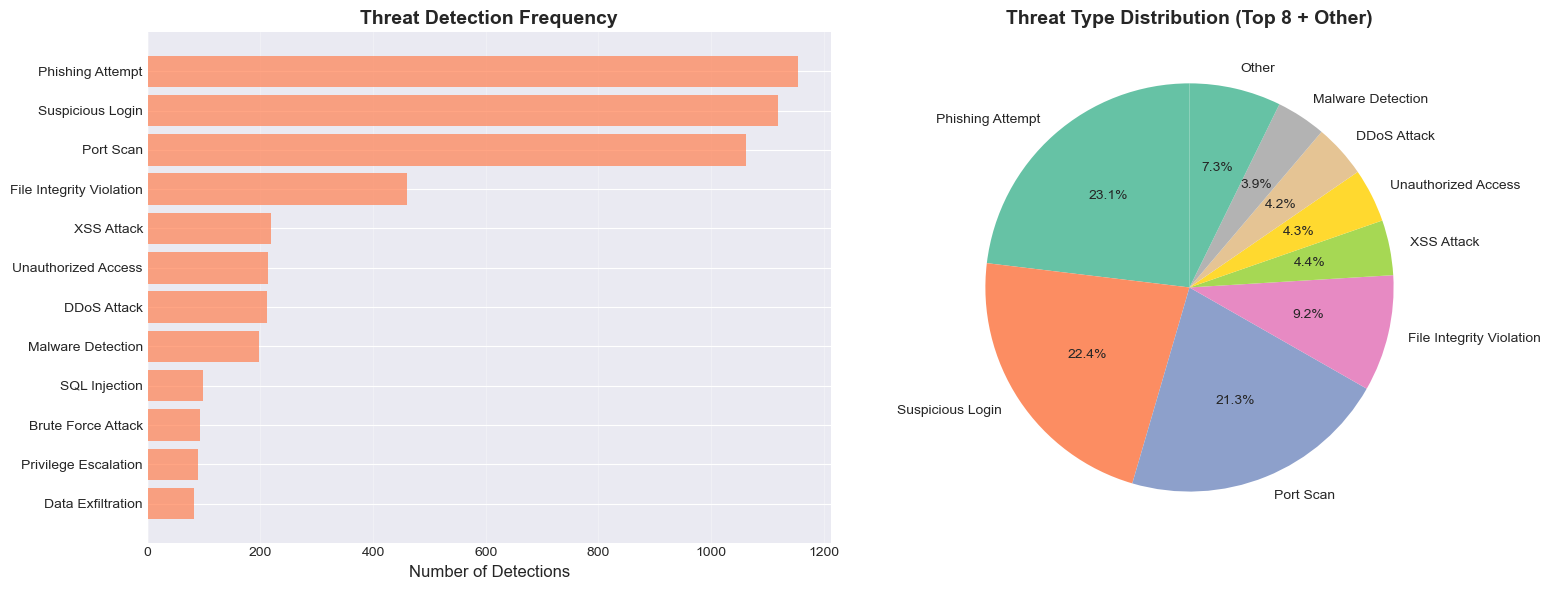

In [8]:
# Setting Figure parameters

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
axes[0].barh(threat_counts.index[::-1], threat_counts.values[::-1], color='coral', alpha=0.7)
axes[0].set_xlabel('Number of Detections', fontsize=12)
axes[0].set_title('Threat Detection Frequency', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Pie chart for top threats
top_threats = threat_counts.head(8)
other_count = threat_counts[8:].sum()
plot_data = pd.concat([top_threats, pd.Series({'Other': other_count})])
axes[1].pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Threat Type Distribution (Top 8 + Other)', fontsize=14, fontweight='bold')

#Saving plot
plt.tight_layout()
plt.savefig('plots_problem2/q1a_threat_types.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q1a_threat_types.png")

In [12]:
# Bar chart
axes[0].barh(threat_counts.index[::-1], threat_counts.values[::-1], color='coral', alpha=0.7)
axes[0].set_xlabel('Number of Detections', fontsize=12)
axes[0].set_title('Threat Detection Frequency', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

In [13]:
# Pie chart for top threats
top_threats = threat_counts.head(8)
other_count = threat_counts[8:].sum()
plot_data = pd.concat([top_threats, pd.Series({'Other': other_count})])
axes[1].pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Threat Type Distribution (Top 8 + Other)', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Threat Type Distribution (Top 8 + Other)')

In [14]:
# Display figures
plt.show()

In [15]:
#Saving plot
plt.tight_layout()
plt.savefig('plots_problem2/q1a_threat_types.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q1a_threat_types.png")

✓ Saved: plots_problem2/q1a_threat_types.png


<Figure size 640x480 with 0 Axes>

# Q1b: Severity distribution

In [9]:
severity_counts = df['severity'].value_counts()
print("\nSeverity distribution:")
print(severity_counts)
print(f"\nPercentages:")
print((severity_counts / len(df) * 100).round(2))


Severity distribution:
severity
Low         2053
Medium      1745
High         839
Critical     363
Name: count, dtype: int64

Percentages:
severity
Low         41.06
Medium      34.90
High        16.78
Critical     7.26
Name: count, dtype: float64


# Q1c: Threat trends over time

In [11]:
daily_threats = df.groupby('date').size().reset_index(name='count')

✓ Saved: plots_problem2/q1c_threat_trends.png


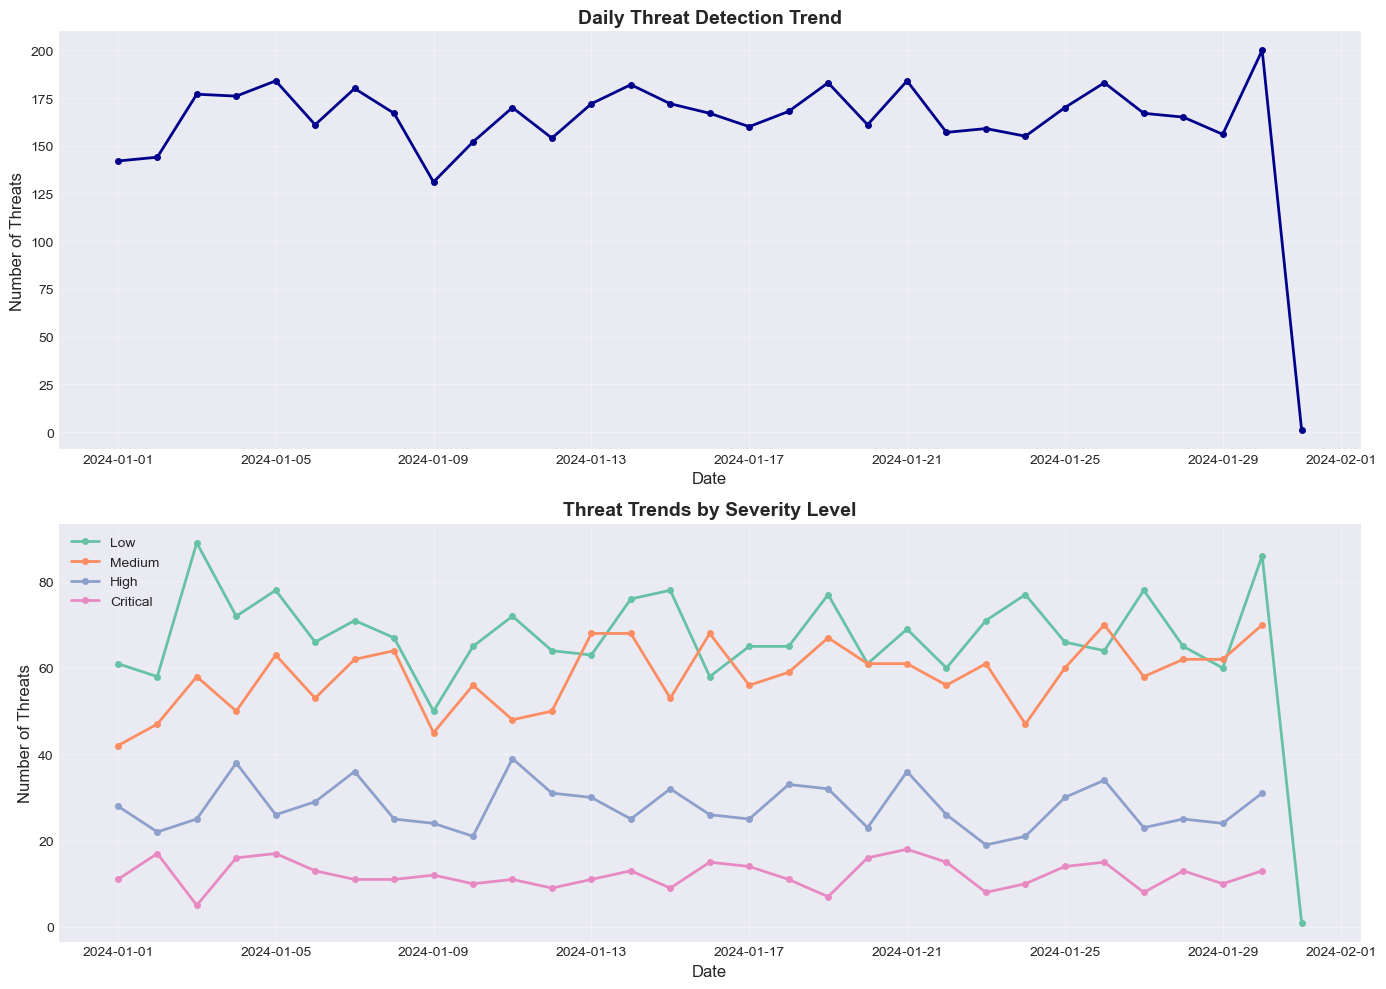

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Overall trend
axes[0].plot(daily_threats['date'], daily_threats['count'], 
            marker='o', linewidth=2, color='darkblue', markersize=4)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number of Threats', fontsize=12)
axes[0].set_title('Daily Threat Detection Trend', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# By severity over time
severity_daily = df.groupby(['date', 'severity']).size().reset_index(name='count')
for severity in ['Low', 'Medium', 'High', 'Critical']:
    sev_data = severity_daily[severity_daily['severity'] == severity]
    axes[1].plot(sev_data['date'], sev_data['count'], 
                marker='o', linewidth=2, label=severity, markersize=4)

axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Number of Threats', fontsize=12)
axes[1].set_title('Threat Trends by Severity Level', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots_problem2/q1c_threat_trends.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q1c_threat_trends.png")

In [21]:
# Overall trend
axes[0].plot(daily_threats['date'], daily_threats['count'], 
            marker='o', linewidth=2, color='darkblue', markersize=4)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number of Threats', fontsize=12)
axes[0].set_title('Daily Threat Detection Trend', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

In [22]:
# By severity over time
severity_daily = df.groupby(['date', 'severity']).size().reset_index(name='count')
for severity in ['Low', 'Medium', 'High', 'Critical']:
    sev_data = severity_daily[severity_daily['severity'] == severity]
    axes[1].plot(sev_data['date'], sev_data['count'], 
                marker='o', linewidth=2, label=severity, markersize=4)

In [23]:
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Number of Threats', fontsize=12)
axes[1].set_title('Threat Trends by Severity Level', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

In [24]:
plt.show()

In [25]:
plt.tight_layout()
plt.savefig('plots_problem2/q1c_threat_trends.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q1c_threat_trends.png")

✓ Saved: plots_problem2/q1c_threat_trends.png


<Figure size 640x480 with 0 Axes>

# Q2: SEVERITY ANALYSIS

In [13]:
print("\nQ2a: Threat Types Most Likely to be Critical")
severity_by_type = pd.crosstab(df['threat_type'], df['severity'], normalize='index') * 100



Q2a: Threat Types Most Likely to be Critical


In [27]:
print("\nPercentage of each threat type by severity:")
print(severity_by_type.round(2))


Percentage of each threat type by severity:
severity                  Critical   High    Low  Medium
threat_type                                             
Brute Force Attack           100.0    0.0   0.00    0.00
DDoS Attack                    0.0  100.0   0.00    0.00
Data Exfiltration            100.0    0.0   0.00    0.00
File Integrity Violation       0.0    0.0   0.00  100.00
Malware Detection              0.0  100.0   0.00    0.00
Phishing Attempt               0.0    0.0  60.78   39.22
Port Scan                      0.0    0.0  60.87   39.13
Privilege Escalation         100.0    0.0   0.00    0.00
SQL Injection                100.0    0.0   0.00    0.00
Suspicious Login               0.0    0.0  62.91   37.09
Unauthorized Access            0.0  100.0   0.00    0.00
XSS Attack                     0.0  100.0   0.00    0.00


In [15]:
critical_threats = severity_by_type['Critical'].sort_values(ascending=False)
print("\nThreat types most likely to be Critical:")
print(critical_threats.head(10))


Threat types most likely to be Critical:
threat_type
Brute Force Attack          100.0
Data Exfiltration           100.0
Privilege Escalation        100.0
SQL Injection               100.0
DDoS Attack                   0.0
File Integrity Violation      0.0
Malware Detection             0.0
Phishing Attempt              0.0
Port Scan                     0.0
Suspicious Login              0.0
Name: Critical, dtype: float64


# Q2b: Response time by severity

In [16]:
print("\nQ2b: Response Time by Severity")
response_stats = df.groupby('severity')['response_time_minutes'].agg(['mean', 'median', 'std'])
print("\nResponse time statistics by severity:")
print(response_stats.round(2))


Q2b: Response Time by Severity

Response time statistics by severity:
           mean  median    std
severity                      
Critical   8.25     8.0   4.23
High      17.31    17.0   7.76
Low       75.42    75.0  26.36
Medium    37.50    38.0  13.23


# Q2c: Treemap visualization


Q2c: Creating Treemap of Threats
✓ Saved: plots_problem2/q2_severity_analysis.png


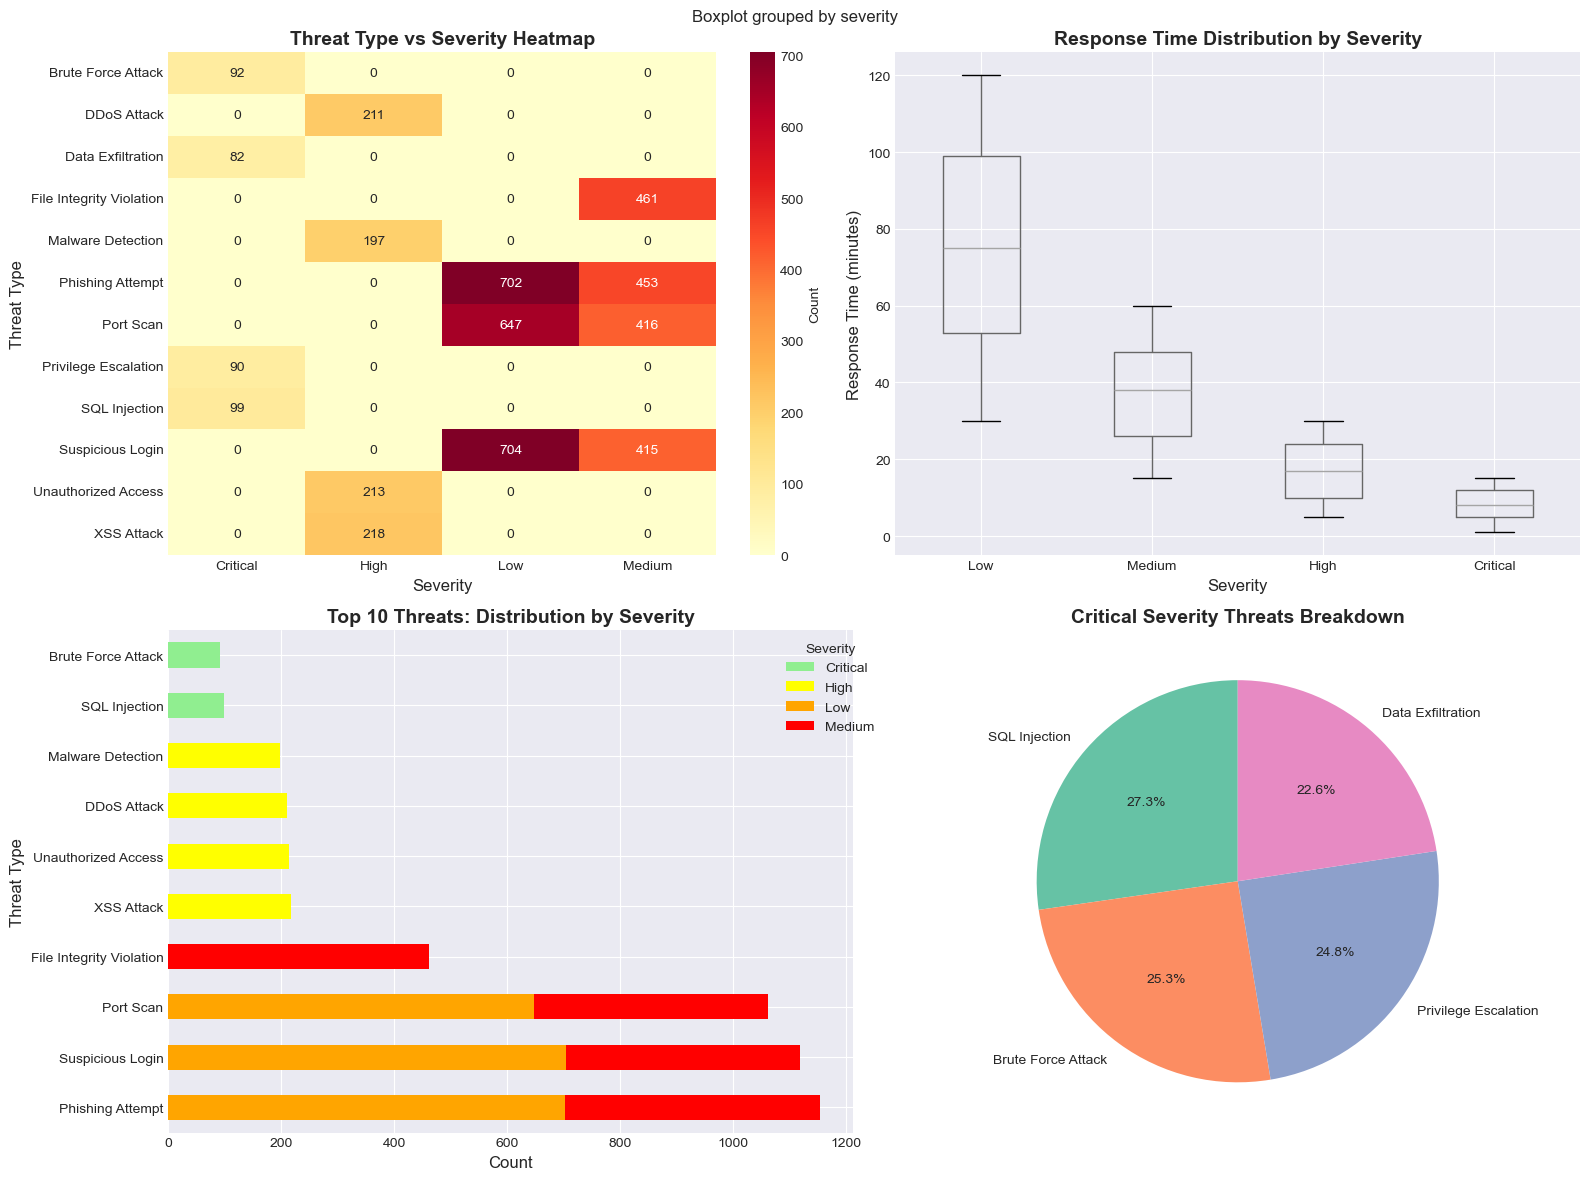

In [17]:
print("\nQ2c: Creating Treemap of Threats")
threat_severity_counts = df.groupby(['severity', 'threat_type']).size().reset_index(name='count')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Heatmap: Threat type vs Severity
threat_sev_matrix = pd.crosstab(df['threat_type'], df['severity'])
sns.heatmap(threat_sev_matrix, annot=True, fmt='d', cmap='YlOrRd', 
           cbar_kws={'label': 'Count'}, ax=axes[0,0])
axes[0,0].set_title('Threat Type vs Severity Heatmap', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Severity', fontsize=12)
axes[0,0].set_ylabel('Threat Type', fontsize=12)

# Box plot: Response time by severity
severity_order = ['Low', 'Medium', 'High', 'Critical']
df_ordered = df.copy()
df_ordered['severity'] = pd.Categorical(df_ordered['severity'], categories=severity_order, ordered=True)
df_ordered.boxplot(column='response_time_minutes', by='severity', ax=axes[0,1])
axes[0,1].set_title('Response Time Distribution by Severity', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Severity', fontsize=12)
axes[0,1].set_ylabel('Response Time (minutes)', fontsize=12)
plt.sca(axes[0,1])
plt.xticks(rotation=0)

# Stacked bar: Threat distribution by severity
threat_sev_matrix_top = threat_sev_matrix.loc[threat_counts.head(10).index]
threat_sev_matrix_top.plot(kind='barh', stacked=True, ax=axes[1,0], 
                           color=['lightgreen', 'yellow', 'orange', 'red'])
axes[1,0].set_title('Top 10 Threats: Distribution by Severity', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Count', fontsize=12)
axes[1,0].set_ylabel('Threat Type', fontsize=12)
axes[1,0].legend(title='Severity', bbox_to_anchor=(1.05, 1))

# Critical threats breakdown
critical_df = df[df['severity'] == 'Critical']
critical_breakdown = critical_df['threat_type'].value_counts()
axes[1,1].pie(critical_breakdown, labels=critical_breakdown.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Critical Severity Threats Breakdown', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('plots_problem2/q2_severity_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q2_severity_analysis.png")


In [31]:
# Heatmap: Threat type vs Severity
threat_sev_matrix = pd.crosstab(df['threat_type'], df['severity'])
sns.heatmap(threat_sev_matrix, annot=True, fmt='d', cmap='YlOrRd', 
           cbar_kws={'label': 'Count'}, ax=axes[0,0])
axes[0,0].set_title('Threat Type vs Severity Heatmap', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Severity', fontsize=12)
axes[0,0].set_ylabel('Threat Type', fontsize=12)

# Box plot: Response time by severity
severity_order = ['Low', 'Medium', 'High', 'Critical']
df_ordered = df.copy()
df_ordered['severity'] = pd.Categorical(df_ordered['severity'], categories=severity_order, ordered=True)
df_ordered.boxplot(column='response_time_minutes', by='severity', ax=axes[0,1])
axes[0,1].set_title('Response Time Distribution by Severity', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Severity', fontsize=12)
axes[0,1].set_ylabel('Response Time (minutes)', fontsize=12)
plt.sca(axes[0,1])
plt.xticks(rotation=0)

# Stacked bar: Threat distribution by severity
threat_sev_matrix_top = threat_sev_matrix.loc[threat_counts.head(10).index]
threat_sev_matrix_top.plot(kind='barh', stacked=True, ax=axes[1,0], 
                           color=['lightgreen', 'yellow', 'orange', 'red'])
axes[1,0].set_title('Top 10 Threats: Distribution by Severity', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Count', fontsize=12)
axes[1,0].set_ylabel('Threat Type', fontsize=12)
axes[1,0].legend(title='Severity', bbox_to_anchor=(1.05, 1))

# Critical threats breakdown
critical_df = df[df['severity'] == 'Critical']
critical_breakdown = critical_df['threat_type'].value_counts()
axes[1,1].pie(critical_breakdown, labels=critical_breakdown.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Critical Severity Threats Breakdown', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('plots_problem2/q2_severity_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q2_severity_analysis.png")


✓ Saved: plots_problem2/q2_severity_analysis.png


# Q3: DETECTION PERFORMANCE

# Q3a: Detection method effectiveness

In [18]:
detection_stats = df.groupby('detection_method').agg({
    'confidence_score': ['mean', 'count'],
    'threat_type': 'nunique'
}).round(2)
detection_stats.columns = ['avg_confidence', 'detection_count', 'unique_threats']
detection_stats = detection_stats.sort_values('avg_confidence', ascending=False)

print("\nDetection method statistics:")
print(detection_stats)


Detection method statistics:
                  avg_confidence  detection_count  unique_threats
detection_method                                                 
Firewall                   76.49              661              12
SIEM                       75.79              703              12
EDR                        75.75              767              12
Network Monitor            75.56              739              12
IDS/IPS                    75.49              684              12
Log Analysis               75.41              728              12
Antivirus                  74.47              718              12


# Q3b: Confidence by threat type

In [19]:
print("\nQ3b: Confidence Score by Threat Type")
confidence_by_threat = df.groupby('threat_type')['confidence_score'].mean().sort_values(ascending=False)
print("\nAverage confidence score by threat type:")
print(confidence_by_threat.round(2))


Q3b: Confidence Score by Threat Type

Average confidence score by threat type:
threat_type
Unauthorized Access         86.19
XSS Attack                  84.83
Data Exfiltration           84.66
Malware Detection           84.65
DDoS Attack                 84.63
Brute Force Attack          84.60
Privilege Escalation        84.46
SQL Injection               84.19
Port Scan                   73.05
Suspicious Login            72.94
File Integrity Violation    72.37
Phishing Attempt            71.97
Name: confidence_score, dtype: float64


# Q3c: Low confidence threats

In [20]:
print("\nQ3c: Low Confidence Detections (Potential False Positives)")
low_confidence = df[df['confidence_score'] < 70]
print(f"\nFound {len(low_confidence)} low confidence detections ({len(low_confidence)/len(df)*100:.2f}%)")


Q3c: Low Confidence Detections (Potential False Positives)

Found 1115 low confidence detections (22.30%)


In [21]:
low_conf_breakdown = low_confidence['threat_type'].value_counts()
print("\nLow confidence detections by threat type:")
print(low_conf_breakdown.head(10))


Low confidence detections by threat type:
threat_type
Phishing Attempt            346
Suspicious Login            338
Port Scan                   301
File Integrity Violation    130
Name: count, dtype: int64


✓ Saved: plots_problem2/q3_detection_performance.png


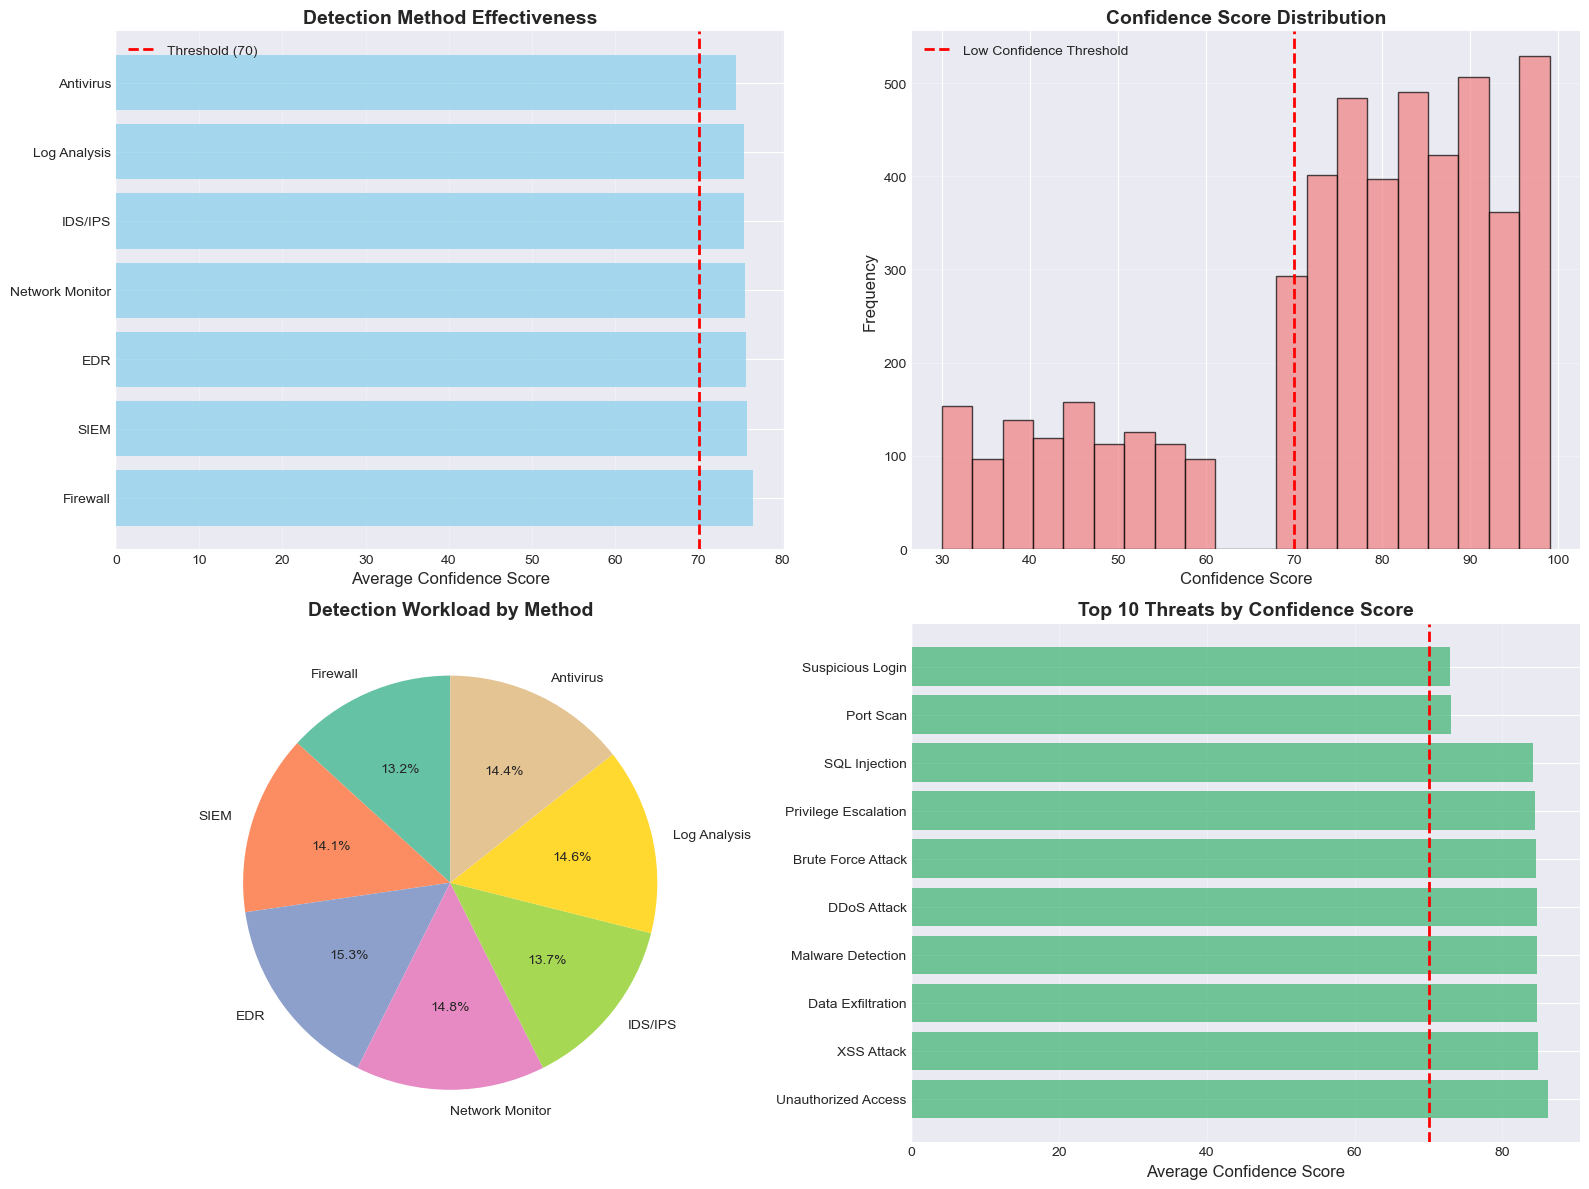

In [22]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Detection method effectiveness
axes[0,0].barh(detection_stats.index, detection_stats['avg_confidence'], color='skyblue', alpha=0.7)
axes[0,0].set_xlabel('Average Confidence Score', fontsize=12)
axes[0,0].set_title('Detection Method Effectiveness', fontsize=14, fontweight='bold')
axes[0,0].axvline(x=70, color='red', linestyle='--', linewidth=2, label='Threshold (70)')
axes[0,0].legend()
axes[0,0].grid(axis='x', alpha=0.3)

# Confidence distribution
axes[0,1].hist(df['confidence_score'], bins=20, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0,1].axvline(x=70, color='red', linestyle='--', linewidth=2, label='Low Confidence Threshold')
axes[0,1].set_xlabel('Confidence Score', fontsize=12)
axes[0,1].set_ylabel('Frequency', fontsize=12)
axes[0,1].set_title('Confidence Score Distribution', fontsize=14, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(axis='y', alpha=0.3)

# Detection method workload
axes[1,0].pie(detection_stats['detection_count'], labels=detection_stats.index, 
             autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Detection Workload by Method', fontsize=14, fontweight='bold')

# Confidence by threat type (top 10)
top_threats_conf = confidence_by_threat.head(10)
axes[1,1].barh(range(len(top_threats_conf)), top_threats_conf.values, color='mediumseagreen', alpha=0.7)
axes[1,1].set_yticks(range(len(top_threats_conf)))
axes[1,1].set_yticklabels(top_threats_conf.index)
axes[1,1].set_xlabel('Average Confidence Score', fontsize=12)
axes[1,1].set_title('Top 10 Threats by Confidence Score', fontsize=14, fontweight='bold')
axes[1,1].axvline(x=70, color='red', linestyle='--', linewidth=2)
axes[1,1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('plots_problem2/q3_detection_performance.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q3_detection_performance.png")

In [37]:
# Detection method workload
axes[1,0].pie(detection_stats['detection_count'], labels=detection_stats.index, 
             autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Detection Workload by Method', fontsize=14, fontweight='bold')

# Confidence by threat type (top 10)
top_threats_conf = confidence_by_threat.head(10)
axes[1,1].barh(range(len(top_threats_conf)), top_threats_conf.values, color='mediumseagreen', alpha=0.7)
axes[1,1].set_yticks(range(len(top_threats_conf)))
axes[1,1].set_yticklabels(top_threats_conf.index)
axes[1,1].set_xlabel('Average Confidence Score', fontsize=12)
axes[1,1].set_title('Top 10 Threats by Confidence Score', fontsize=14, fontweight='bold')
axes[1,1].axvline(x=70, color='red', linestyle='--', linewidth=2)
axes[1,1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('plots_problem2/q3_detection_performance.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q3_detection_performance.png")

✓ Saved: plots_problem2/q3_detection_performance.png


<Figure size 640x480 with 0 Axes>

# Q4: RESPONSE TIME ANALYSIS

# Q4a: Response time by severity

In [39]:
print(response_stats)

               mean  median        std
severity                              
Critical   8.250689     8.0   4.227700
High      17.312277    17.0   7.764599
Low       75.420848    75.0  26.355054
Medium    37.504298    38.0  13.226290


# Q4b: Response time trends

In [23]:
print("\nQ4b: Response Time Trends Over Time")
df['week'] = df['timestamp'].dt.isocalendar().week
weekly_response = df.groupby('week')['response_time_minutes'].mean()

print("\nWeekly average response time:")
print(weekly_response.round(2))


Q4b: Response Time Trends Over Time

Weekly average response time:
week
1    48.01
2    47.46
3    46.60
4    48.14
5    47.77
Name: response_time_minutes, dtype: float64


# Q4c: Box plot


Q4c: Response Time Distribution Visualization
✓ Saved: plots_problem2/q4_response_time.png


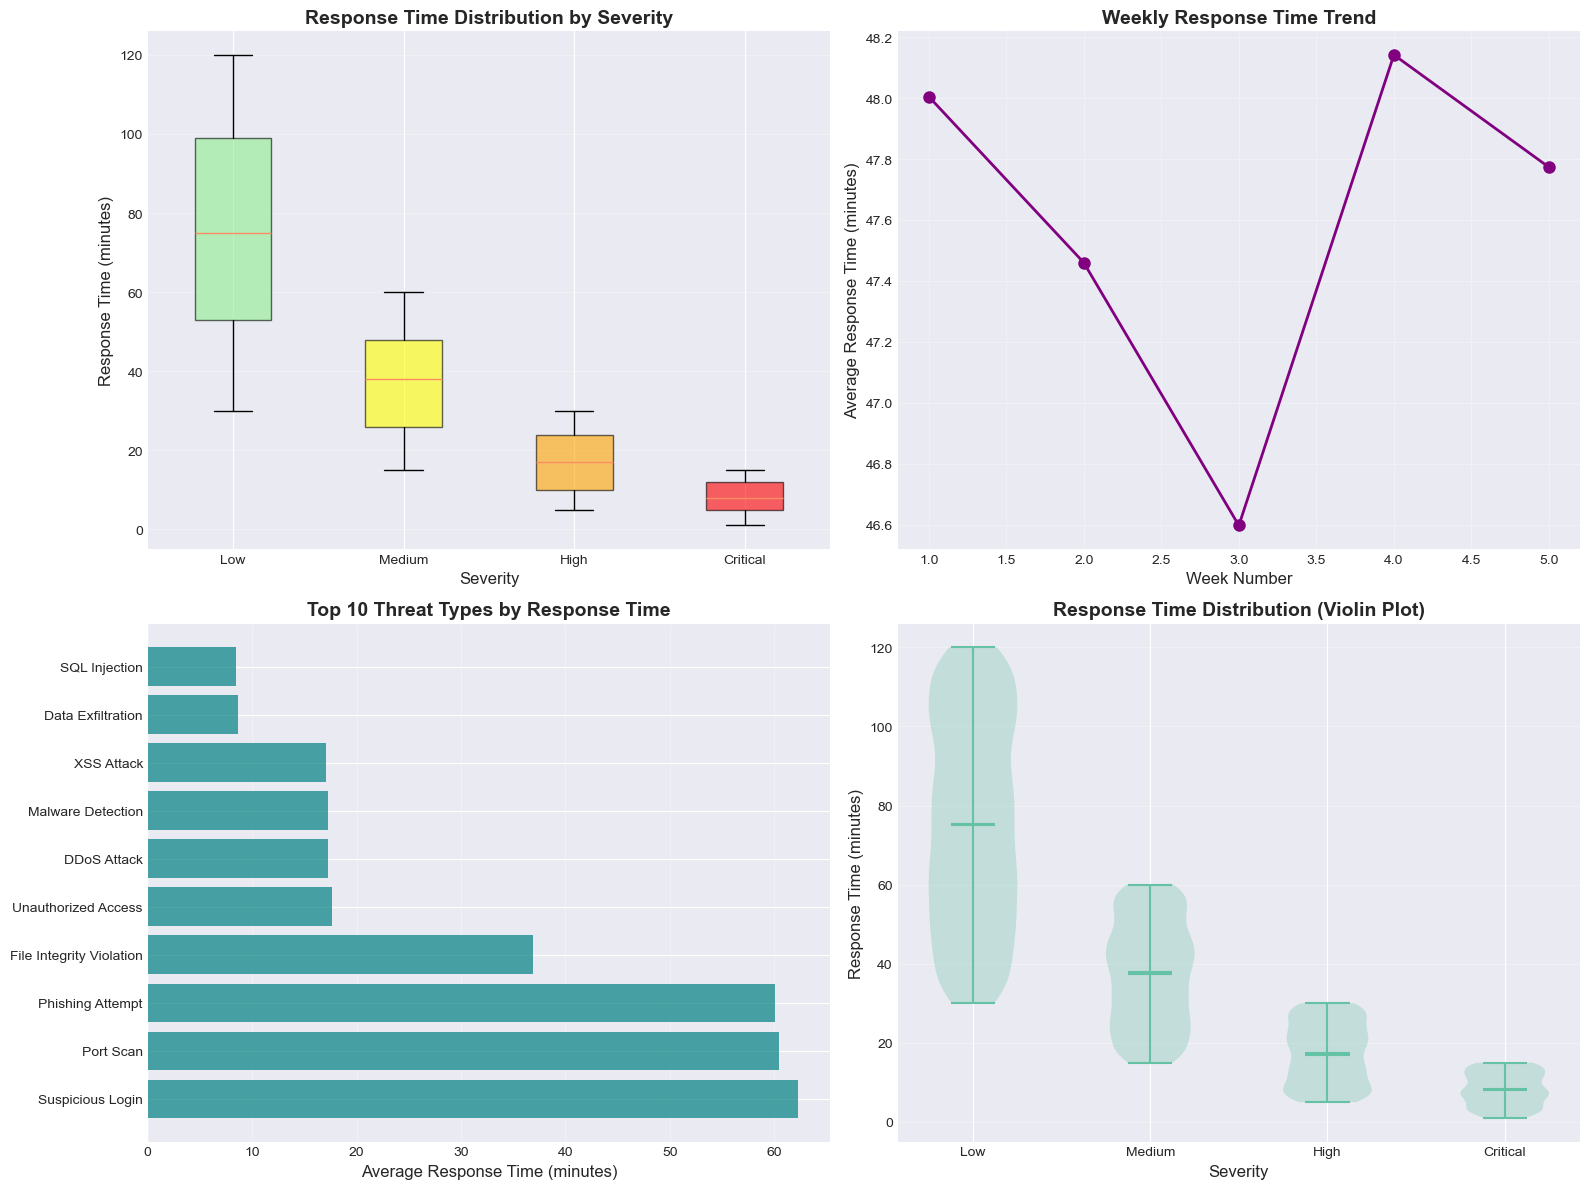

In [41]:
print("\nQ4c: Response Time Distribution Visualization")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Response time by severity
severity_order = ['Low', 'Medium', 'High', 'Critical']
response_by_sev = [df[df['severity'] == sev]['response_time_minutes'].values for sev in severity_order]
bp = axes[0,0].boxplot(response_by_sev, labels=severity_order, patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightgreen', 'yellow', 'orange', 'red']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[0,0].set_ylabel('Response Time (minutes)', fontsize=12)
axes[0,0].set_xlabel('Severity', fontsize=12)
axes[0,0].set_title('Response Time Distribution by Severity', fontsize=14, fontweight='bold')
axes[0,0].grid(axis='y', alpha=0.3)

# Response time trends
axes[0,1].plot(weekly_response.index, weekly_response.values, 
              marker='o', linewidth=2, markersize=8, color='purple')
axes[0,1].set_xlabel('Week Number', fontsize=12)
axes[0,1].set_ylabel('Average Response Time (minutes)', fontsize=12)
axes[0,1].set_title('Weekly Response Time Trend', fontsize=14, fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Response time by threat type (top 10)
response_by_threat = df.groupby('threat_type')['response_time_minutes'].mean().sort_values(ascending=False).head(10)
axes[1,0].barh(range(len(response_by_threat)), response_by_threat.values, color='teal', alpha=0.7)
axes[1,0].set_yticks(range(len(response_by_threat)))
axes[1,0].set_yticklabels(response_by_threat.index)
axes[1,0].set_xlabel('Average Response Time (minutes)', fontsize=12)
axes[1,0].set_title('Top 10 Threat Types by Response Time', fontsize=14, fontweight='bold')
axes[1,0].grid(axis='x', alpha=0.3)

# Violin plot
severity_data = df[['severity', 'response_time_minutes']].copy()
severity_data['severity'] = pd.Categorical(severity_data['severity'], 
                                          categories=severity_order, ordered=True)
severity_data = severity_data.sort_values('severity')
parts = axes[1,1].violinplot([severity_data[severity_data['severity'] == sev]['response_time_minutes'].values 
                              for sev in severity_order],
                             positions=range(len(severity_order)),
                             showmeans=True, showmedians=True)
axes[1,1].set_xticks(range(len(severity_order)))
axes[1,1].set_xticklabels(severity_order)
axes[1,1].set_ylabel('Response Time (minutes)', fontsize=12)
axes[1,1].set_xlabel('Severity', fontsize=12)
axes[1,1].set_title('Response Time Distribution (Violin Plot)', fontsize=14, fontweight='bold')
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('plots_problem2/q4_response_time.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q4_response_time.png")


# Q5: SYSTEM VULNERABILITY ASSESSMENT

# Q5a: Most targeted systems

In [24]:
system_threats = df.groupby('affected_system').agg({
    'threat_type': 'count',
    'severity': lambda x: (x == 'Critical').sum()
}).rename(columns={'threat_type': 'total_threats', 'severity': 'critical_threats'})
system_threats = system_threats.sort_values('total_threats', ascending=False)

print("\nSystem vulnerability statistics:")
print(system_threats)



System vulnerability statistics:
                 total_threats  critical_threats
affected_system                                 
Email Server              1088                29
Workstation               1035                29
Database Server            465               129
Firewall                   421                29
VPN Gateway                417                28
AD Server                  407                35
File Server                396                30
Web Server                 390                33
DNS Server                 381                21


# Q5b: High severity threats by system


In [25]:
high_sev_systems = df[df['severity'].isin(['High', 'Critical'])]
high_sev_by_system = high_sev_systems.groupby('affected_system').size().sort_values(ascending=False)

print("\nHigh/Critical threats by system:")
print(high_sev_by_system)


High/Critical threats by system:
affected_system
Email Server       220
Database Server    197
Workstation        194
AD Server          109
Firewall           105
VPN Gateway        104
File Server         97
Web Server          91
DNS Server          85
dtype: int64


# Q5c: Bubble chart

✓ Saved: plots_problem2/q5_system_vulnerability.png


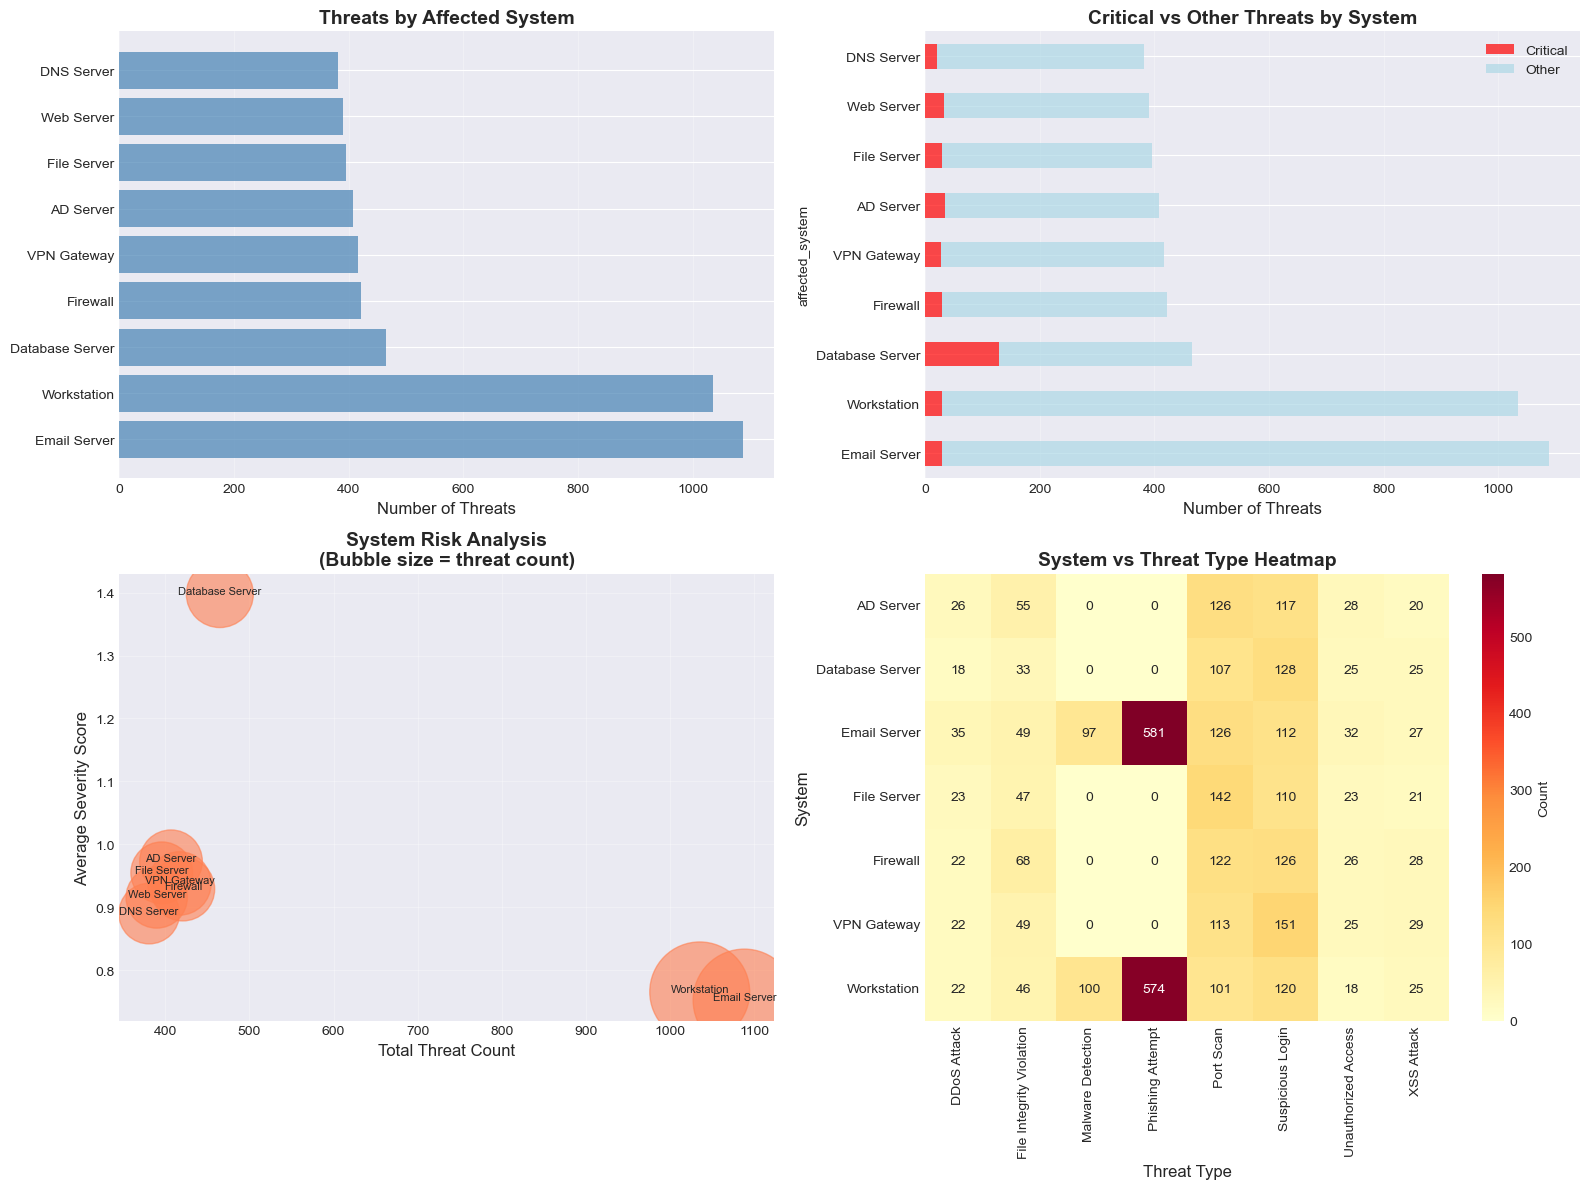

In [44]:
system_risk = df.groupby('affected_system').agg({
    'threat_type': 'count',
    'severity': lambda x: pd.Categorical(x, categories=['Low', 'Medium', 'High', 'Critical'], 
                                        ordered=True).codes.mean()
}).rename(columns={'threat_type': 'threat_count', 'severity': 'avg_severity_score'})

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Bar chart: Total threats per system
axes[0,0].barh(system_threats.index, system_threats['total_threats'], color='steelblue', alpha=0.7)
axes[0,0].set_xlabel('Number of Threats', fontsize=12)
axes[0,0].set_title('Threats by Affected System', fontsize=14, fontweight='bold')
axes[0,0].grid(axis='x', alpha=0.3)

# Stacked bar: Critical vs other threats
system_threats_plot = system_threats.copy()
system_threats_plot['other_threats'] = system_threats_plot['total_threats'] - system_threats_plot['critical_threats']
system_threats_plot[['critical_threats', 'other_threats']].plot(kind='barh', stacked=True, 
                                                                 ax=axes[0,1],
                                                                 color=['red', 'lightblue'],
                                                                 alpha=0.7)
axes[0,1].set_xlabel('Number of Threats', fontsize=12)
axes[0,1].set_title('Critical vs Other Threats by System', fontsize=14, fontweight='bold')
axes[0,1].legend(['Critical', 'Other'])
axes[0,1].grid(axis='x', alpha=0.3)

# Bubble chart
axes[1,0].scatter(system_risk['threat_count'], system_risk['avg_severity_score'],
                 s=system_risk['threat_count']*5, alpha=0.6, color='coral')
for idx, row in system_risk.iterrows():
    axes[1,0].annotate(idx, (row['threat_count'], row['avg_severity_score']), 
                      fontsize=8, ha='center')
axes[1,0].set_xlabel('Total Threat Count', fontsize=12)
axes[1,0].set_ylabel('Average Severity Score', fontsize=12)
axes[1,0].set_title('System Risk Analysis\n(Bubble size = threat count)', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Heatmap: System vs Threat Type (top systems and threats)
top_systems = system_threats.head(7).index
top_threats_list = threat_counts.head(8).index
system_threat_matrix = pd.crosstab(df[df['affected_system'].isin(top_systems)]['affected_system'],
                                   df[df['threat_type'].isin(top_threats_list)]['threat_type'])
sns.heatmap(system_threat_matrix, annot=True, fmt='d', cmap='YlOrRd', 
           cbar_kws={'label': 'Count'}, ax=axes[1,1])
axes[1,1].set_title('System vs Threat Type Heatmap', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Threat Type', fontsize=12)
axes[1,1].set_ylabel('System', fontsize=12)

plt.tight_layout()
plt.savefig('plots_problem2/q5_system_vulnerability.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q5_system_vulnerability.png")


# Q6: USER RISK ANALYSIS

# Q6a: Users with most threats

In [46]:
print("\nQ6a: Users Associated with Most Threats")
user_threats = df.groupby('user_account').agg({
    'threat_type': 'count',
    'severity': lambda x: (x.isin(['High', 'Critical'])).sum()
}).rename(columns={'threat_type': 'total_threats', 'severity': 'high_sev_threats'})
user_threats = user_threats.sort_values('total_threats', ascending=False)

print("\nTop 20 users by threat count:")
print(user_threats.head(20))


Q6a: Users Associated with Most Threats

Top 20 users by threat count:
               total_threats  high_sev_threats
user_account                                  
root                     154                87
admin                    147                79
administrator            135                79
user022                  110                22
user029                  107                24
user044                  105                27
user028                  102                23
user009                  101                17
user002                  101                16
user021                   98                31
user019                   98                27
user030                   98                20
user012                   98                20
user010                   97                19
user011                   97                23
user006                   97                21
user040                   97                23
user039                   94       

# Q6b: Privileged accounts

In [47]:
print("\nQ6b: Privileged Accounts in Incidents")
privileged_accounts = ['admin', 'root', 'administrator', 'sysadmin', 'dbadmin']
priv_threats = df[df['user_account'].isin(privileged_accounts)]

print(f"\nThreats involving privileged accounts: {len(priv_threats)} ({len(priv_threats)/len(df)*100:.2f}%)")
priv_breakdown = priv_threats.groupby('user_account').agg({
    'threat_type': 'count',
    'severity': lambda x: pd.Categorical(x, categories=['Low', 'Medium', 'High', 'Critical'],
                                        ordered=True).codes.mean()
}).rename(columns={'threat_type': 'threat_count', 'severity': 'avg_severity'})

print("\nPrivileged account threat statistics:")
print(priv_breakdown)



Q6b: Privileged Accounts in Incidents

Threats involving privileged accounts: 607 (12.14%)

Privileged account threat statistics:
               threat_count  avg_severity
user_account                             
admin                   147      1.761905
administrator           135      1.859259
dbadmin                  91      0.912088
root                    154      1.727273
sysadmin                 80      0.837500


# Q6c: User risk visualization


Q6c: User Risk Visualization
✓ Saved: plots_problem2/q6_user_risk.png


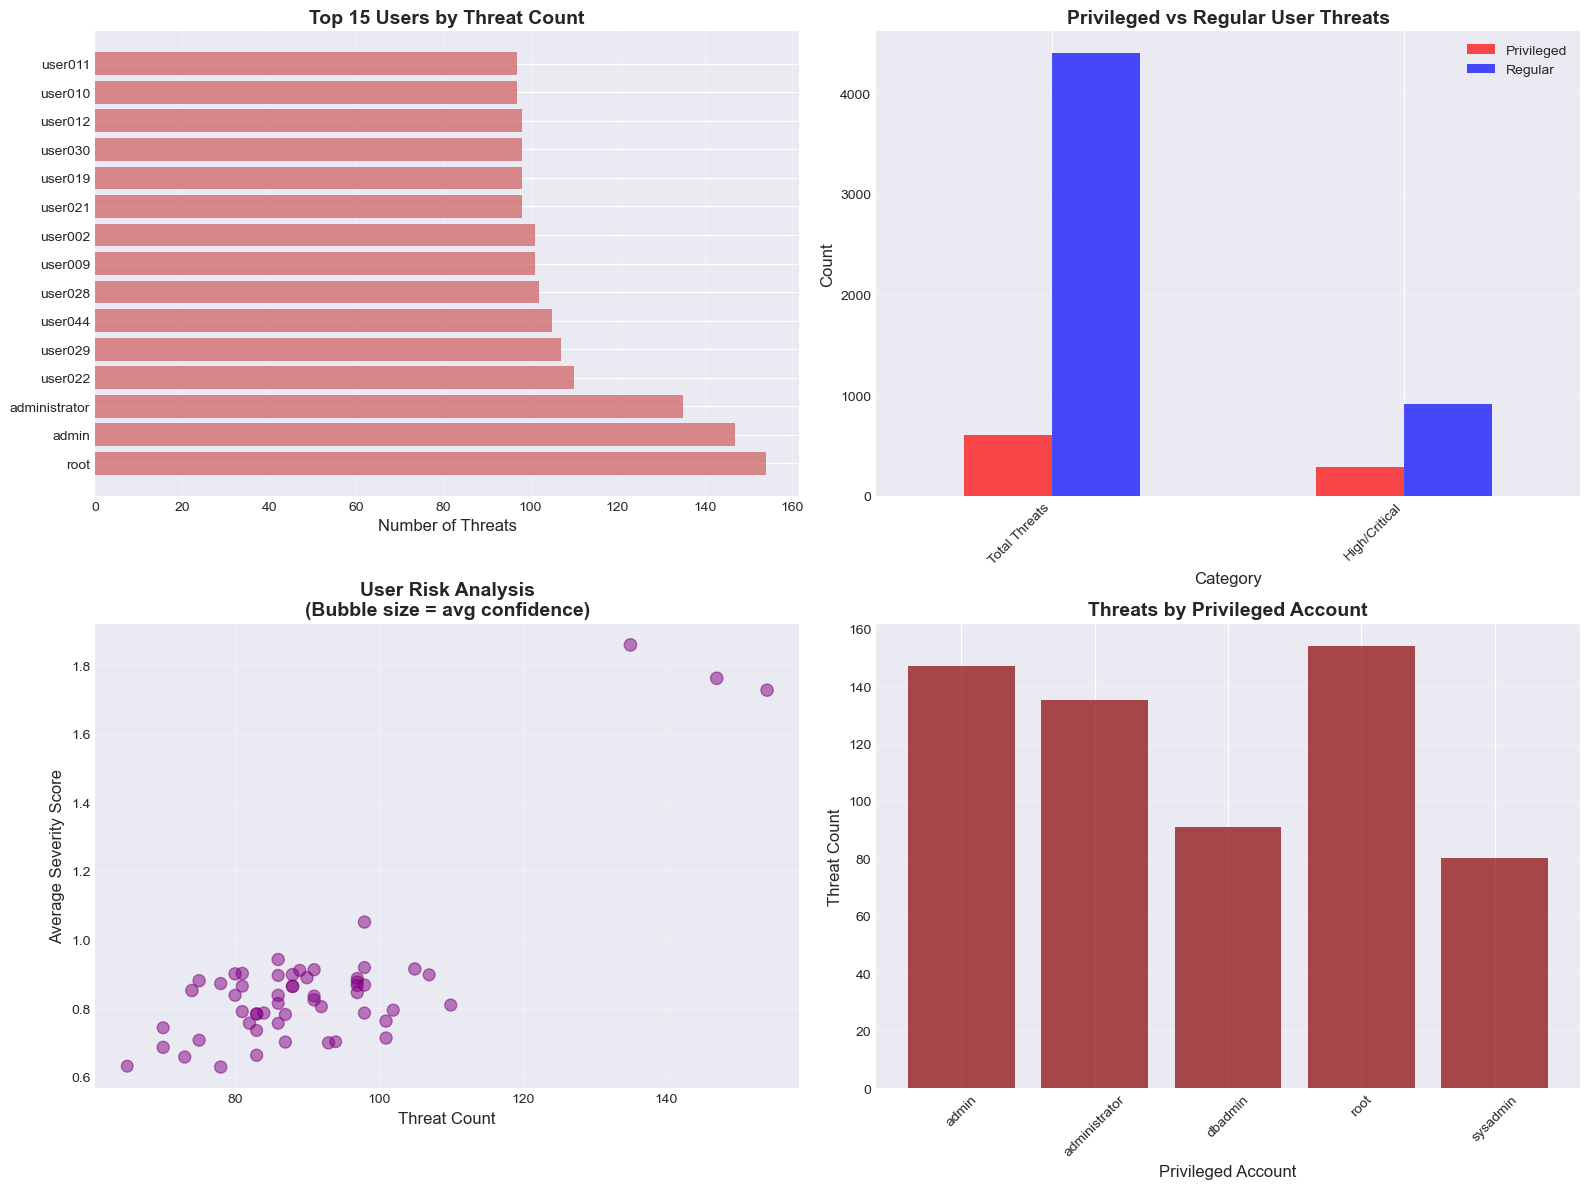

In [48]:
print("\nQ6c: User Risk Visualization")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top users by threat count
top_users = user_threats.head(15)
axes[0,0].barh(range(len(top_users)), top_users['total_threats'], color='indianred', alpha=0.7)
axes[0,0].set_yticks(range(len(top_users)))
axes[0,0].set_yticklabels(top_users.index)
axes[0,0].set_xlabel('Number of Threats', fontsize=12)
axes[0,0].set_title('Top 15 Users by Threat Count', fontsize=14, fontweight='bold')
axes[0,0].grid(axis='x', alpha=0.3)

# Privileged vs regular users
priv_regular_comparison = pd.DataFrame({
    'Privileged': [len(priv_threats), priv_threats[priv_threats['severity'].isin(['High', 'Critical'])].shape[0]],
    'Regular': [len(df) - len(priv_threats), 
               len(df[~df['user_account'].isin(privileged_accounts) & 
                     df['severity'].isin(['High', 'Critical'])])]
}, index=['Total Threats', 'High/Critical'])

priv_regular_comparison.plot(kind='bar', ax=axes[0,1], color=['red', 'blue'], alpha=0.7)
axes[0,1].set_xlabel('Category', fontsize=12)
axes[0,1].set_ylabel('Count', fontsize=12)
axes[0,1].set_title('Privileged vs Regular User Threats', fontsize=14, fontweight='bold')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha='right')
axes[0,1].legend()
axes[0,1].grid(axis='y', alpha=0.3)

# User risk score scatter
user_risk_score = df.groupby('user_account').agg({
    'threat_type': 'count',
    'severity': lambda x: pd.Categorical(x, categories=['Low', 'Medium', 'High', 'Critical'],
                                        ordered=True).codes.mean(),
    'confidence_score': 'mean'
}).rename(columns={'threat_type': 'threat_count', 'severity': 'avg_severity', 
                   'confidence_score': 'avg_confidence'})

axes[1,0].scatter(user_risk_score['threat_count'], user_risk_score['avg_severity'],
                 s=user_risk_score['avg_confidence'], alpha=0.5, color='purple')
axes[1,0].set_xlabel('Threat Count', fontsize=12)
axes[1,0].set_ylabel('Average Severity Score', fontsize=12)
axes[1,0].set_title('User Risk Analysis\n(Bubble size = avg confidence)', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Privileged account details
if len(priv_breakdown) > 0:
    axes[1,1].bar(priv_breakdown.index, priv_breakdown['threat_count'], color='darkred', alpha=0.7)
    axes[1,1].set_xlabel('Privileged Account', fontsize=12)
    axes[1,1].set_ylabel('Threat Count', fontsize=12)
    axes[1,1].set_title('Threats by Privileged Account', fontsize=14, fontweight='bold')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('plots_problem2/q6_user_risk.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q6_user_risk.png")


# Q7 & Q8: STATUS AND SOURCE ANALYSIS

# Q7a: Status distribution

In [49]:
status_counts = df['status'].value_counts()
print("\nStatus distribution:")
print(status_counts)
print(f"\nPercentages:")
print((status_counts / len(df) * 100).round(2))


Status distribution:
status
Blocked           2393
False Positive    1115
Detected           779
Investigating      318
Quarantined        253
Mitigated          142
Name: count, dtype: int64

Percentages:
status
Blocked           47.86
False Positive    22.30
Detected          15.58
Investigating      6.36
Quarantined        5.06
Mitigated          2.84
Name: count, dtype: float64


# Q7b: Status by severity

In [50]:
print("\nQ7b: Resolution Status by Severity")
status_by_severity = pd.crosstab(df['severity'], df['status'], normalize='index') * 100
print("\nStatus distribution by severity (%):")
print(status_by_severity.round(2))


Q7b: Resolution Status by Severity

Status distribution by severity (%):
status    Blocked  Detected  False Positive  Investigating  Mitigated  \
severity                                                                
Critical    17.63      0.00            0.00          43.25      39.12   
High        50.66      0.00            0.00          19.19       0.00   
Low         50.27     20.99           28.74           0.00       0.00   
Medium      49.97     19.94           30.09           0.00       0.00   

status    Quarantined  
severity               
Critical         0.00  
High            30.15  
Low              0.00  
Medium           0.00  


# Q8: INTERNAL VS EXTERNAL THREATS

# Q8a: Internal vs external comparison

In [51]:
print("\nQ8a: Internal vs External Threat Comparison")
internal_external = df.groupby('is_internal').agg({
    'threat_type': 'count',
    'severity': lambda x: (x.isin(['High', 'Critical'])).sum()
}).rename(columns={'threat_type': 'total_threats', 'severity': 'high_critical_count'})

print("\nInternal vs External threats:")
print(internal_external)


Q8a: Internal vs External Threat Comparison

Internal vs External threats:
             total_threats  high_critical_count
is_internal                                    
False                 3518                  982
True                  1482                  220


# Q8b: Threat types by source

In [52]:
print("\nQ8b: Threat Types by Source (Internal/External)")
threat_by_source = pd.crosstab(df['threat_type'], df['is_internal'])
threat_by_source.columns = ['External', 'Internal']
print("\nTop threat types by source:")
print(threat_by_source.sort_values('External', ascending=False).head(10))


Q8b: Threat Types by Source (Internal/External)

Top threat types by source:
                          External  Internal
threat_type                                 
Suspicious Login               757       362
Phishing Attempt               756       399
Port Scan                      725       338
File Integrity Violation       298       163
XSS Attack                     218         0
DDoS Attack                    211         0
Malware Detection              131        66
Unauthorized Access            129        84
SQL Injection                   99         0
Data Exfiltration               82         0


✓ Saved: plots_problem2/q7q8_status_source.png


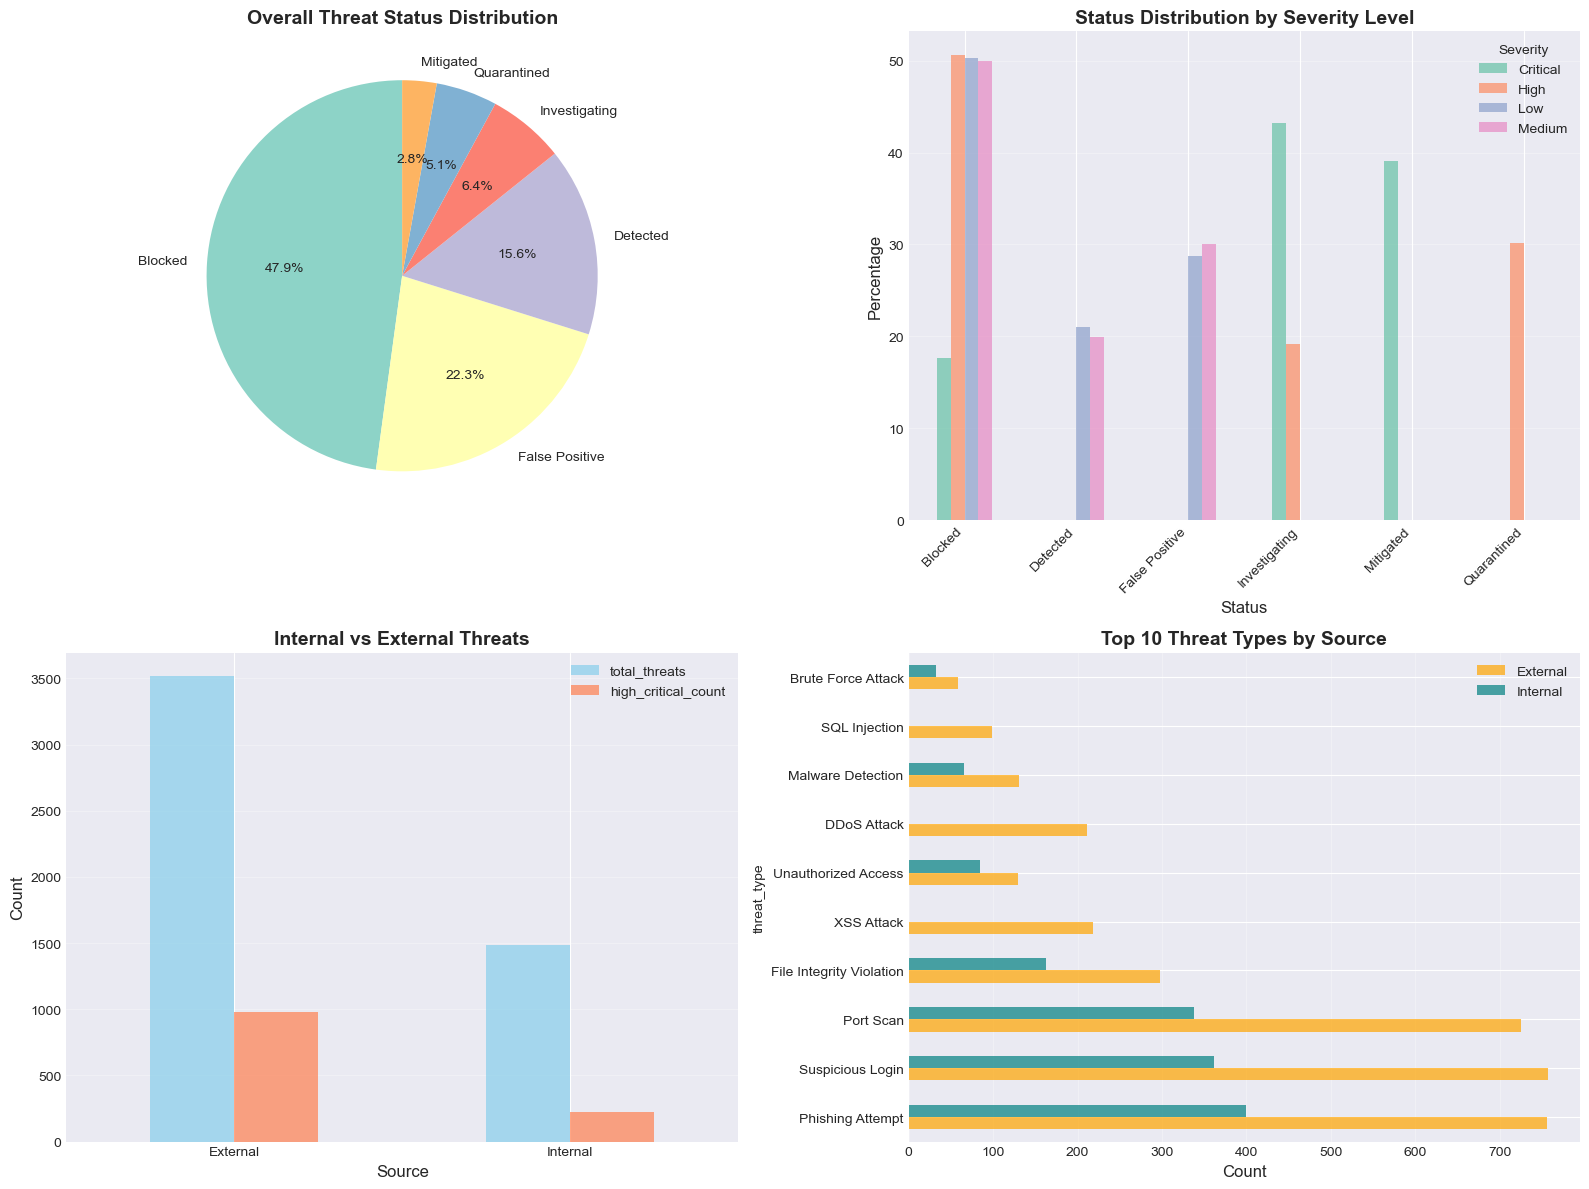

In [53]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Status distribution
axes[0,0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
             startangle=90, colors=sns.color_palette('Set3'))
axes[0,0].set_title('Overall Threat Status Distribution', fontsize=14, fontweight='bold')

# Status by severity stacked bar
status_by_severity.T.plot(kind='bar', stacked=False, ax=axes[0,1], alpha=0.7)
axes[0,1].set_xlabel('Status', fontsize=12)
axes[0,1].set_ylabel('Percentage', fontsize=12)
axes[0,1].set_title('Status Distribution by Severity Level', fontsize=14, fontweight='bold')
axes[0,1].legend(title='Severity')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha='right')
axes[0,1].grid(axis='y', alpha=0.3)

# Internal vs external
internal_external.plot(kind='bar', ax=axes[1,0], color=['skyblue', 'coral'], alpha=0.7)
axes[1,0].set_xlabel('Source', fontsize=12)
axes[1,0].set_ylabel('Count', fontsize=12)
axes[1,0].set_title('Internal vs External Threats', fontsize=14, fontweight='bold')
axes[1,0].set_xticklabels(['External', 'Internal'], rotation=0)
axes[1,0].legend()
axes[1,0].grid(axis='y', alpha=0.3)

# Threat types by source (top 10)
top_10_threats = threat_by_source.sum(axis=1).sort_values(ascending=False).head(10).index
threat_by_source_top = threat_by_source.loc[top_10_threats]
threat_by_source_top.plot(kind='barh', ax=axes[1,1], color=['orange', 'teal'], alpha=0.7)
axes[1,1].set_xlabel('Count', fontsize=12)
axes[1,1].set_title('Top 10 Threat Types by Source', fontsize=14, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('plots_problem2/q7q8_status_source.png', dpi=300, bbox_inches='tight')
print("✓ Saved: plots_problem2/q7q8_status_source.png")
